In [1]:

import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# if your Jupyter kernel crashes during this code, use this setting
# import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv("../Datasets/nvidia_stock_prices.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,5.214671,5.308604,5.117086,5.217039,5.587962e+08
std,9.643976,9.811276,9.465058,9.644928,3.363408e+08
min,0.080583,0.083917,0.077500,0.078583,4.564400e+07
25%,0.344000,0.349000,0.336500,0.343250,3.482920e+08
50%,0.544000,0.552750,0.532500,0.542000,4.910920e+08
75%,5.233750,5.296500,5.125000,5.229000,6.816760e+08
max,50.216000,50.548000,49.411999,50.409000,5.088948e+09


In [5]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scale only relevant variables
num_cols = ['Open', 'High', 'Low','Close', 'Volume']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.002310,0.002282,0.002328,0.002260,0.077483
1,2004-01-05,0.002287,0.002299,0.002351,0.002384,0.105020
2,2004-01-06,0.002342,0.002487,0.002424,0.002545,0.207741
3,2004-01-07,0.002468,0.002489,0.002542,0.002581,0.124400
4,2004-01-08,0.002603,0.002540,0.002630,0.002596,0.076955


In [9]:
# let's use the sequence number instead of the time stamp
# starting from 1 until the final row
df['sequence'] = df.index + 1
df = df.drop(['Date'], axis=1)

In [10]:
df.head()

,Open,High,Low,Close,Volume,sequence
0,0.002310,0.002282,0.002328,0.002260,0.077483,1
1,0.002287,0.002299,0.002351,0.002384,0.105020,2
2,0.002342,0.002487,0.002424,0.002545,0.207741,3
3,0.002468,0.002489,0.002542,0.002581,0.124400,4
4,0.002603,0.002540,0.002630,0.002596,0.076955,5


In [11]:

df.tail()

,Open,High,Low,Close,Volume,sequence
5028,0.979635,0.976914,0.980845,0.968627,0.041017,5029
5029,0.975107,0.981214,0.990838,0.977548,0.039370,5030
5030,0.985938,0.982800,0.993372,0.980290,0.037278,5031
5031,0.988571,0.986842,1.000000,0.982376,0.039844,5032
5032,0.991962,0.989081,0.986602,0.982376,0.068140,5033


In [12]:
from numpy.lib.stride_tricks import sliding_window_view

timestep_size = 50
open_windows = sliding_window_view(df['Open'].values, timestep_size)
close_windows = sliding_window_view(df['Close'].values, timestep_size)

X = np.vstack((open_windows, close_windows))
y = np.array([0] * len(open_windows) + [1] * len(close_windows))


In [13]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)


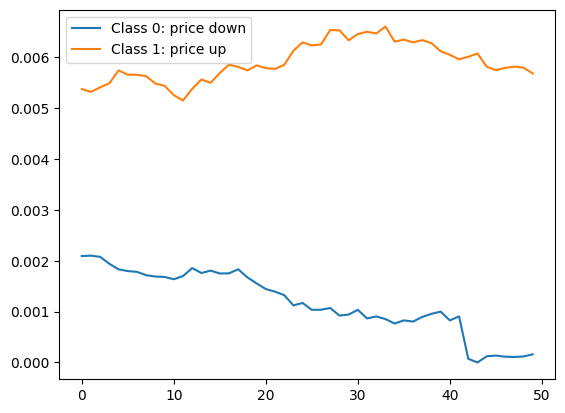

In [19]:
test_signal_index = 2

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: price down")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: price up")
plt.legend()

In [15]:
train_size = 0.7
splitter = int(len(X) * train_size)

# split to train/test
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [16]:

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

6977
2991
6977
2991


In [17]:
#convert the data into the required CNN -format
# usually the easiest approach is to modify
# your own dataset to follow the data format used by another example
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [18]:
x_train

array([[[0.00769416],
        [0.00770082],
        [0.00724538],
        ...,
        [0.0101309 ],
        [0.01002453],
        [0.00986496]],

       [[0.00621152],
        [0.00629629],
        [0.00614171],
        ...,
        [0.00459091],
        [0.00506462],
        [0.00500977]],

       [[0.00599373],
        [0.00600367],
        [0.0059987 ],
        ...,
        [0.00632653],
        [0.00645568],
        [0.00656496]],

       ...,

       [[0.0221334 ],
        [0.02206359],
        [0.02220819],
        ...,
        [0.02987244],
        [0.02928902],
        [0.02915438]],

       [[0.00637607],
        [0.006401  ],
        [0.00637607],
        ...,
        [0.00767755],
        [0.0073634 ],
        [0.00724871]],

       [[0.01031706],
        [0.01061625],
        [0.01043342],
        ...,
        [0.00856847],
        [0.00848536],
        [0.00876793]]], shape=(6977, 50, 1))

In [20]:
class_names = np.array(['down', 'up'])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model = keras.Sequential(
        [
            # input layer
            keras.layers.Input(input_shape),

            # convolutional layer 1 (we usually have 1-3 convolutional layers
            # depending how much and how complex the data is) -> "model capacity / decision space"
            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),

            # pooling + flatten (adapter from convolutional to dense)
            # flattening is done only once after the final convolutional layer 
            # and before the Dense-network
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            # neural network Dense-tail
            keras.layers.Dense(64, activation="relu"),

            # output layer
            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model


model = make_model(input_shape=x_train.shape[1:])

# pip install pydot -> restart Jupyter kernel after this
# keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,802 (18.76 KB)

 Trainable params: 4,674 (18.26 KB)

 Non-trainable params: 128 (512.00 B)

In [21]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.keras", save_best_only=True, monitor="val_loss"
    )
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6987 - sparse_categorical_accuracy: 0.4920 - val_loss: 0.6933 - val_sparse_categorical_accuracy: 0.5050
Epoch 2/500
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6955 - sparse_categorical_accuracy: 0.4953 - val_loss: 0.6933 - val_sparse_categorical_accuracy: 0.4950
Epoch 3/500
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6958 - sparse_categorical_accuracy: 0.4908 - val_loss: 0.6935 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/500
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6953 - sparse_categorical_accuracy: 0.4979 - val_loss: 0.6945 - val_sparse_categorical_accuracy: 0.5036
Epoch 5/500
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6950 - sparse_categorical_accuracy: 0.5096 - val_loss: 0.6952 - val_sparse_categorical_accuracy: 0.5072
Epoch 6/500
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6956 - sparse_categorical_accuracy: 0.5071 - val_loss: 0.6943 - val_sparse_categorical_accuracy: 0.480

<Axes: >

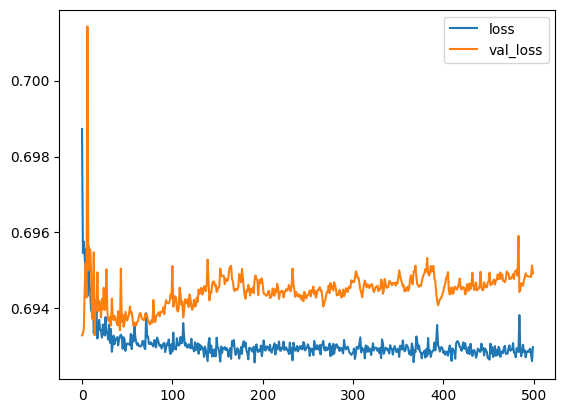

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

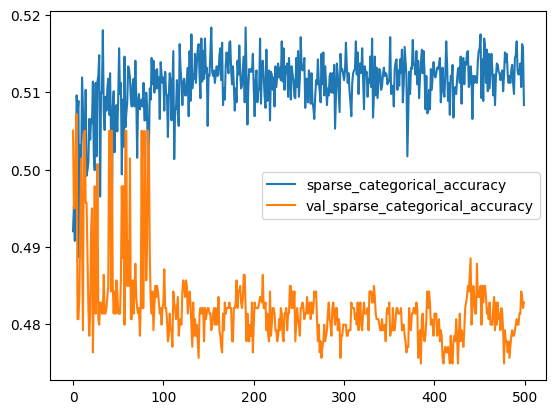

In [23]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [24]:
model = keras.models.load_model("best_model2.keras")

In [25]:
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[0.6938003897666931, 0.4824473559856415]

Train data evaluation:
[0.6930497884750366, 0.5075247287750244]


In [26]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: >

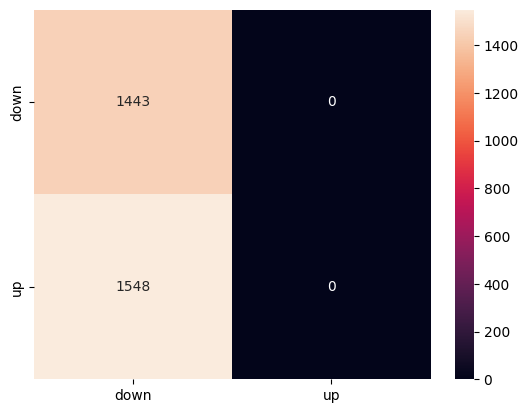

In [27]:
# confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

In [28]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=class_names))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

        down       0.48      1.00      0.65      1443
          up       0.00      0.00      0.00      1548

    accuracy                           0.48      2991
   macro avg       0.24      0.50      0.33      2991
weighted avg       0.23      0.48      0.31      2991


Model overall accuracy: 48.24%


c:\Users\SAAD\Desktop\Deep-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SAAD\Desktop\Deep-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SAAD\Desktop\Deep-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

0
down


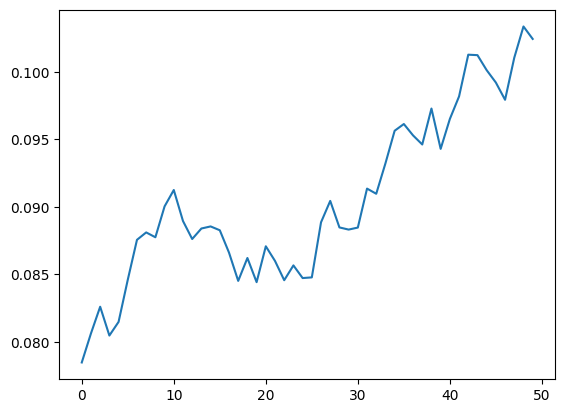

In [29]:
signal_index = 8
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.show()

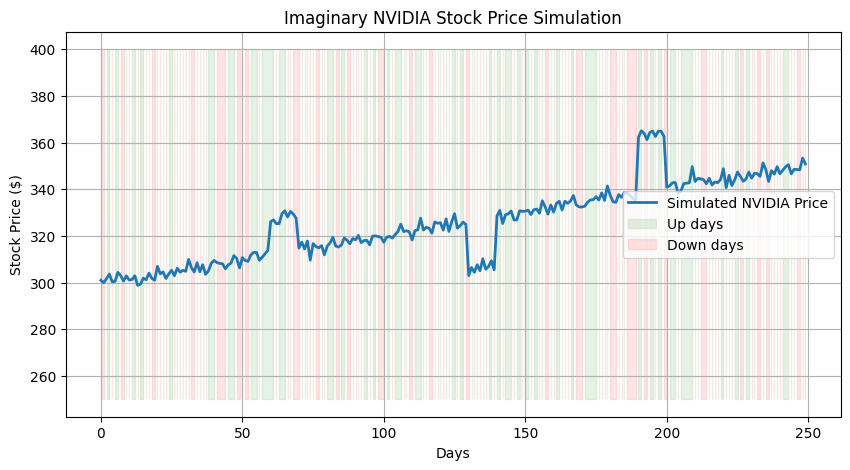

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time axis (e.g., 250 trading days ~ 1 year)
days = np.arange(250)

# Base trend — start around $300 and slowly increase
np.random.seed(42)
base_price = 300 + np.linspace(0, 50, len(days))  # Upward drift

# Add realistic market-like random noise
noise = np.random.normal(0, 2, size=days.shape)  # ±2 dollar fluctuations

# Add some "market event" spikes — big upward and downward movements
price = base_price + noise
price[60:70] += 15   # first strong upward rally
price[130:140] -= 20  # correction / drop
price[190:200] += 25  # second upward rally

# Optional: Clip to realistic price range
price = np.clip(price, 250, 400)

# Compute daily movement direction (your binary target)
movement = (np.diff(price, prepend=price[0]) > 0).astype(int)

# Plot the signal
plt.figure(figsize=(10, 5))
plt.plot(days, price, label='Simulated NVIDIA Price', linewidth=2)
plt.fill_between(days, 250, 400, where=movement==1, color='green', alpha=0.1, label='Up days')
plt.fill_between(days, 250, 400, where=movement==0, color='red', alpha=0.1, label='Down days')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('Imaginary NVIDIA Stock Price Simulation')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# TRY OUR IMAGINARY WIND SIGNAL WITH THE MODEL

# wrap up the data points into the required NumPy-format
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])

# create prediction
test_predict = model.predict(test_batch)
print(test_predict)

# get highest index and print name
index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[0.5213181  0.47868198]]
down


0
down


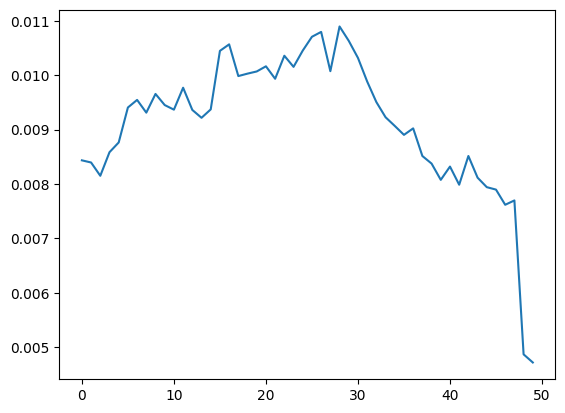

In [32]:
# example signal from test data
# MEAN TEMPERATURE
signal_index = 22
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.show()

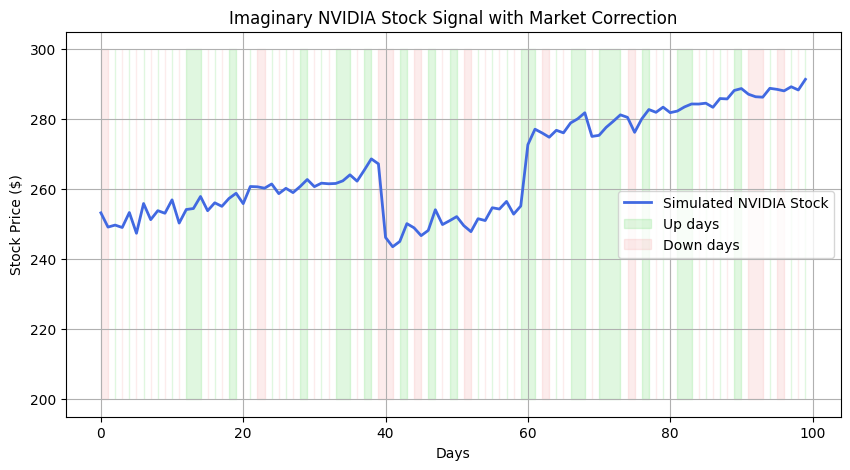

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated "days"
days = np.arange(100)

# Base trend (price slowly rising)
np.random.seed(1)
base_price = 250 + np.linspace(0, 40, len(days))  # Upward trend from $250 to ~$290

# Random daily noise (market variation)
noise = np.random.normal(0, 2, size=days.shape)

# Simulate a "valley" (market correction / dip)
price = base_price + noise
price[40:60] -= 20 + np.random.normal(0, 1, size=20)  # correction dip

# Clip to realistic limits
price = np.clip(price, 200, 300)

# Compute binary movement (1 = up, 0 = down)
movement = (np.diff(price, prepend=price[0]) > 0).astype(int)

# Plot simulated signal
plt.figure(figsize=(10, 5))
plt.plot(days, price, label='Simulated NVIDIA Stock', color='royalblue', linewidth=2)
plt.fill_between(days, 200, 300, where=movement==1, color='limegreen', alpha=0.15, label='Up days')
plt.fill_between(days, 200, 300, where=movement==0, color='lightcoral', alpha=0.15, label='Down days')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('Imaginary NVIDIA Stock Signal with Market Correction')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# TRY OUR IMAGINARY MEAN TEMPERATURE SIGNAL WITH THE MODEL

# wrap up the data points into the required NumPy-format
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])

# create prediction
test_predict = model.predict(test_batch)
print(test_predict)

# get highest index and name for this prediction
index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.5213181  0.47868198]]
down
